In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data =  pd.read_csv("Advertising.csv")

In [3]:
data.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
data.drop(["Unnamed: 0"] ,inplace = True , axis =1)

In [6]:
data.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

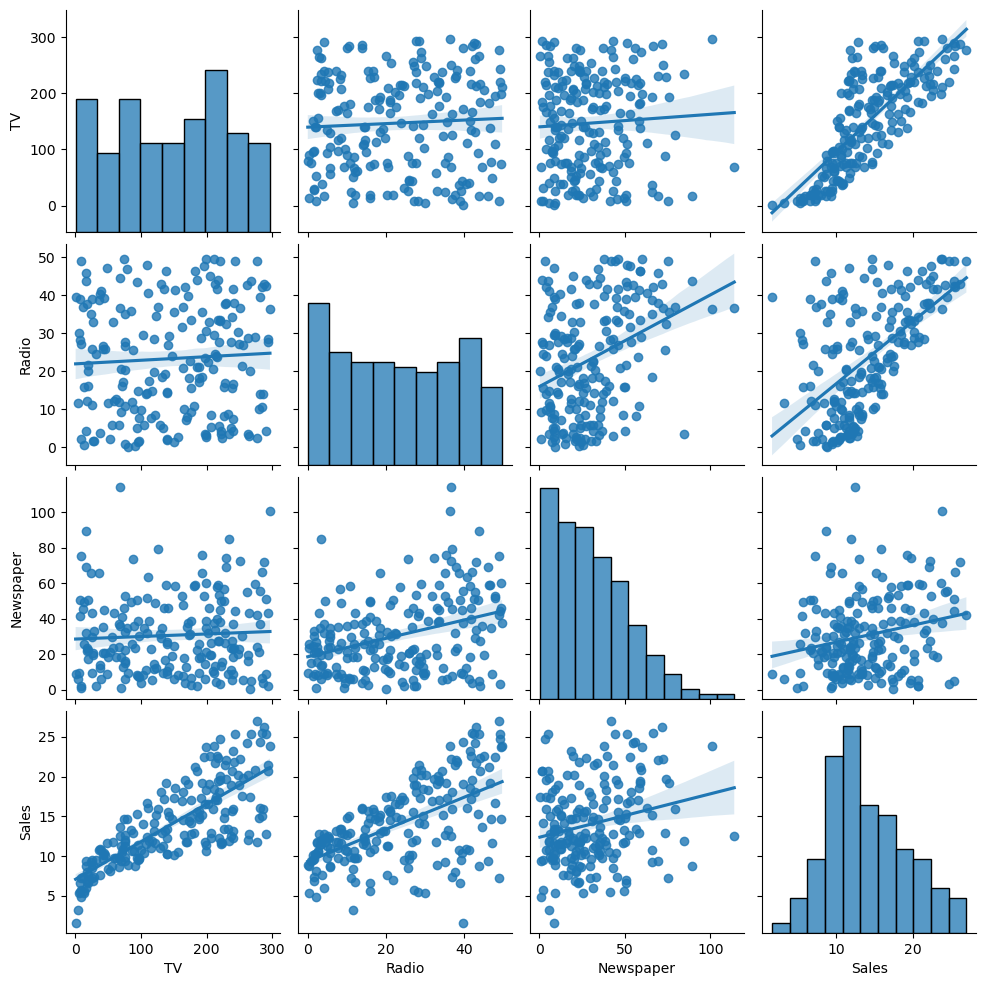

In [12]:
sns.pairplot(data,kind="reg");
plt.show()

In [13]:
data=data[data['Newspaper']<=90]
data.shape

(198, 4)

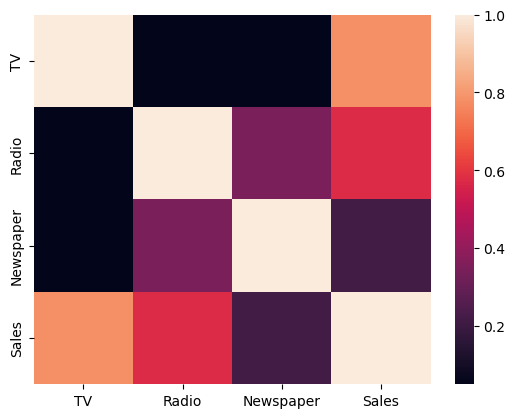

In [55]:
sns.heatmap(data.corr())
plt.show()

In [37]:
x=data.drop(columns=['Sales'])
y=data['Sales']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# prediction with Random Forest

In [40]:
from sklearn.preprocessing import  StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [41]:

scaler=StandardScaler()


In [47]:
from sklearn.ensemble import RandomForestRegressor
r=RandomForestRegressor(n_estimators=10,random_state=0)
pipe=make_pipeline(scaler,r)
pipe.fit(x_train,y_train)
y_pred_r=pipe.predict(x_test)
r2_score(y_test,y_pred_r)

0.9742550844316469

In [48]:
#Let's Check predict function working Good or Not

pipe.predict([[283.6,42.0,66.2]]) #Original ans 25.5

C:\Users\Ryzen 5.000\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([25.43])

In [49]:
pipe.predict([[112.9,17.4,38.6]]) #Original ans 11.9

C:\Users\Ryzen 5.000\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([12.01])

In [56]:
r.feature_importances_

array([0.65553571, 0.33243142, 0.01203286])

# Prediction with linear regression

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lm = LinearRegression()

In [78]:
pipe=make_pipeline(scaler,lm)


In [79]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [80]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [4.0018303  2.73298013 0.19146011]


In [81]:
predictions = lm.predict( x_test)

C:\Users\Ryzen 5.000\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


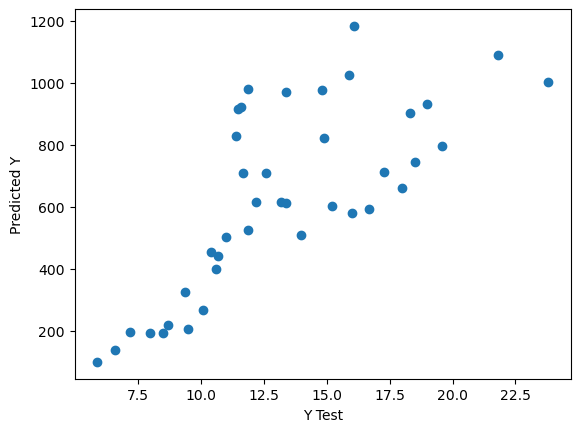

In [82]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [83]:
from sklearn import metrics

In [84]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 615.9144179686867
MSE: 464084.5026872024
RMSE: 681.2374789214128


In [85]:
#Let's Check predict function working Good or Not

pipe.predict([[283.6,42.0,66.2]]) #Original ans 25.5

C:\Users\Ryzen 5.000\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([24.11568694])

In [86]:
pipe.predict([[112.9,17.4,38.6]]) #Original ans 11.9

C:\Users\Ryzen 5.000\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([11.48213267])